In [17]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [146]:
imgA = cv2.imread('C:/Users/tommy/Documents/1.png')
imgB = cv2.imread('C:/Users/tommy/Documents/2.png')
# OpenCVはBRGフォーマットなので、RGBへ変換する
imgA = cv2.cvtColor(imgA, cv2.COLOR_BGR2RGB)
imgB = cv2.cvtColor(imgB, cv2.COLOR_BGR2RGB)
#画像サイズを変更
imgA = cv2.resize(imgA, dsize=(500, 500))
imgB = cv2.resize(imgB, dsize=(500, 500))
# 画像サイズを取得
hA, wA, cA = imgA.shape[:3]
hB, wB, cA = imgB.shape [:3]

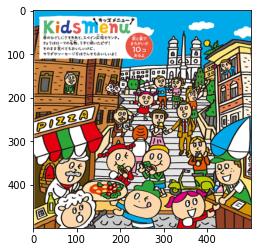

In [147]:
plt.imshow(imgA)

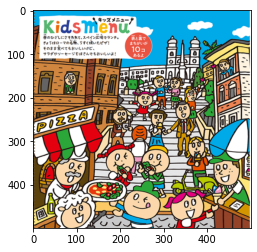

In [148]:
plt.imshow(imgB)

In [149]:
# 特徴量検出器を作成
akaze = cv2.AKAZE_create()
# 二つの画像の特徴点を抽出
kpA, desA = akaze.detectAndCompute(imgA,None)
kpB, desB = akaze.detectAndCompute(imgB,None)

In [150]:
# imageBを透視変換する
# 透視変換: 斜めから撮影した画像を真上から見た画像に変換する感じ
# BFMatcher型のオブジェクトを作成する
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# 記述子をマッチさせる。※スキャン画像(B2)の特徴抽出はforループ前に実施済み。
matches = bf.match(desA,desB)
# マッチしたものを距離順に並べ替える。
matches = sorted(matches, key = lambda x:x.distance)
# マッチしたもの（ソート済み）の中から上位★%（参考：15%)をgoodとする。
good = matches[:int(len(matches) * 0.15)]
# 対応が取れた特徴点の座標を取り出す？
src_pts = np.float32([kpA[m.queryIdx].pt for m in good]).reshape(-1,1,2)
dst_pts = np.float32([kpB[m.trainIdx].pt for m in good]).reshape(-1,1,2)
# findHomography:二つの画像から得られた点の集合を与えると、その物体の投射変換を計算する
M, mask = cv2.findHomography(dst_pts, src_pts, cv2.RANSAC,5.0) # dst_img作成の際だけ使う。warpperspectiveの使い方がわかってない。
# imgBを透視変換。
imgB_transform = cv2.warpPerspective(imgB, M, (wA, hA))

In [153]:
# imgAとdst_imgの差分を求めてresultとする。グレースケールに変換。
result = cv2.absdiff(imgA, imgB_transform)
_binresult_gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
# 二値化
_, result_bin = cv2.threshold(result_gray, 50, 255, cv2.THRESH_BINARY) # 閾値は50

# カーネルを準備（オープニング用）
kernel = np.ones((2,2),np.uint8)
# オープニング（収縮→膨張）実行 ノイズ除去
result_bin = cv2.morphologyEx(result_bin, cv2.MORPH_OPEN, kernel) # オープニング（収縮→膨張）。ノイズ除去。
# 二値画像をRGB形式に変換し、2枚の画像を重ねる。
#result_bin_rgb = cv2.cvtColor(result_bin, cv2.COLOR_GRAY2RGB)
# 輪郭の検出
contours, hierarchy = cv2.findContours(result_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    if w > 5 and h > 5:
        cv2.rectangle(imgB, (x, y), (x + w, y + h), (0, 255, 0), 5)

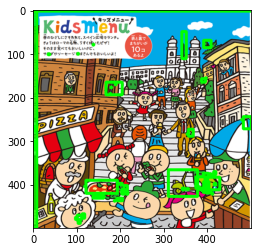

In [154]:
plt.imshow(imgB)

In [1]:
$ git remote add <origin> <https://github.com/MASAYA-KINOSHITA/detection>

SyntaxError: invalid syntax (131989937.py, line 1)

In [ ]:
p